# Heart Disease Prediction

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
data=pd.read_csv('C:/Users/divya/data/dataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
age         720 non-null int64
sex         720 non-null int64
cp          720 non-null int64
trestbps    720 non-null int64
chol        720 non-null int64
fbs         720 non-null int64
restecg     720 non-null int64
thalach     720 non-null int64
exang       720 non-null int64
oldpeak     720 non-null float64
slope       720 non-null int64
ca          708 non-null float64
thal        720 non-null int64
target      720 non-null int64
dtypes: float64(2), int64(12)
memory usage: 78.9 KB


In [5]:
# Understanding the data 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,708.000000,720.000000,720.000000
mean,54.225000,0.618056,1.173611,159.065278,242.956944,0.259722,0.586111,150.641667,0.293056,1.012861,1.311111,0.639831,2.202778,0.515278
std,9.109865,0.486201,1.102090,51.282142,47.365117,0.438787,0.514952,21.378877,0.455480,1.130866,0.663274,0.987300,0.615509,0.500114
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,125.000000,207.750000,0.000000,0.000000,138.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,140.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,177.000000,272.000000,1.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,300.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# to check null values in data
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          12
thal         0
target       0
dtype: int64

In [7]:
data=data.dropna(how='any',axis=0)

No.of people with respect to sex and age having heart disease or not

Text(0.5, 1.0, 'Analyzing Chest pain types')

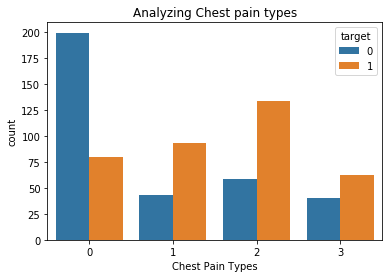

In [9]:
sns.countplot(x='cp',hue='target',data=data)
plt.xlabel("Chest Pain Types")
plt.title("Analyzing Chest pain types")

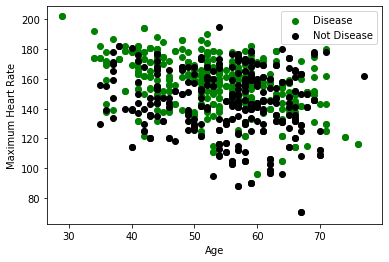

In [10]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Text(0.5, 0, 'Age')

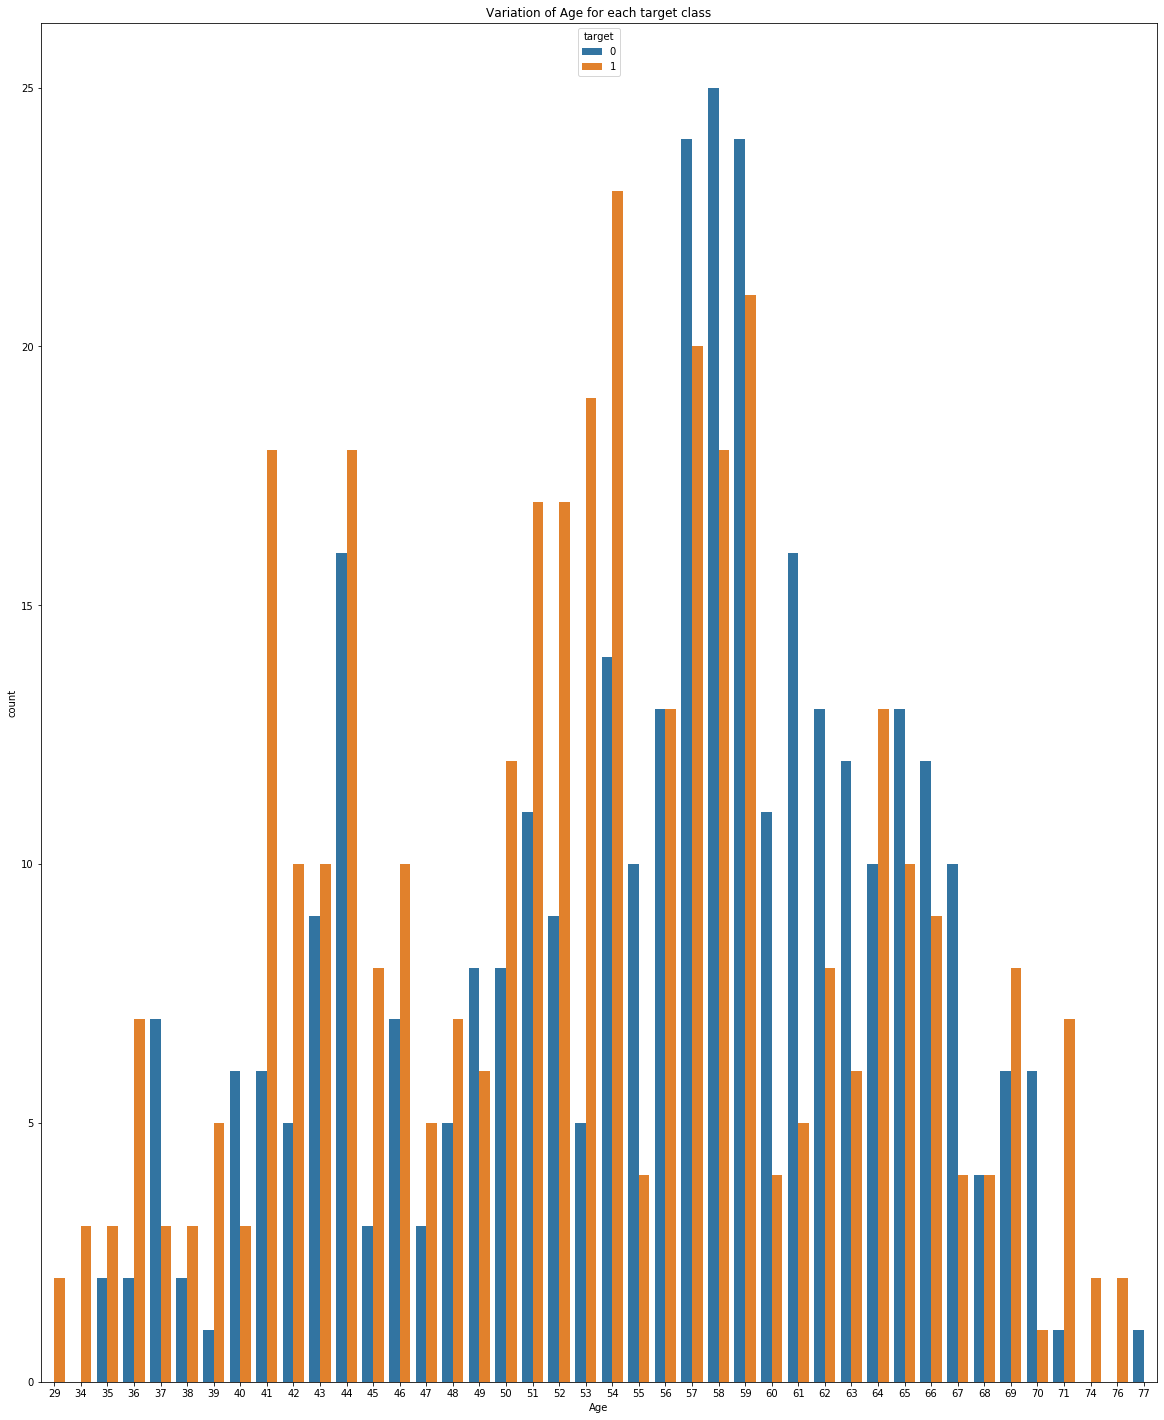

In [11]:
plt.figure(figsize=(20,25))
sns.countplot(x='age',hue='target',data=data)
plt.title('Variation of Age for each target class')
plt.xlabel("Age")

In [13]:
# to see correlation

In [14]:
corrmat=data.corr()

In [15]:
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.114061,-0.018240,0.006569,0.147204,0.054673,-0.058485,-0.314481,0.060241,0.148536,-0.070766,0.225826,0.041398,-0.134921
sex,-0.114061,1.000000,-0.063690,-0.141650,-0.119498,-0.018151,-0.082867,-0.044293,0.098766,0.093716,-0.019120,0.081095,0.191493,-0.173117
cp,-0.018240,-0.063690,1.000000,0.192718,-0.053220,0.158215,0.055563,0.258531,-0.248189,-0.123962,0.038351,-0.188744,-0.139175,0.299538
trestbps,0.006569,-0.141650,0.192718,1.000000,-0.085444,0.346110,0.078040,0.105835,-0.081895,-0.024697,-0.131641,-0.073098,-0.157665,0.000830
chol,0.147204,-0.119498,-0.053220,-0.085444,1.000000,-0.041795,-0.102075,-0.012299,0.081199,0.055046,0.001769,0.067090,0.113798,-0.059597
fbs,0.054673,-0.018151,0.158215,0.346110,-0.041795,1.000000,-0.023473,0.053092,-0.030228,-0.036726,-0.102985,0.035679,-0.104372,-0.000766
restecg,-0.058485,-0.082867,0.055563,0.078040,-0.102075,-0.023473,1.000000,0.025695,-0.068995,-0.035755,0.008628,-0.072911,0.001108,0.073134
thalach,-0.314481,-0.044293,0.258531,0.105835,-0.012299,0.053092,0.025695,1.000000,-0.273627,-0.315393,0.273625,-0.230133,-0.093870,0.338389
exang,0.060241,0.098766,-0.248189,-0.081895,0.081199,-0.030228,-0.068995,-0.273627,1.000000,0.218497,-0.147439,0.074080,0.157084,-0.304223
oldpeak,0.148536,0.093716,-0.123962,-0.024697,0.055046,-0.036726,-0.035755,-0.315393,0.218497,1.000000,-0.380777,0.193262,0.164415,-0.328256


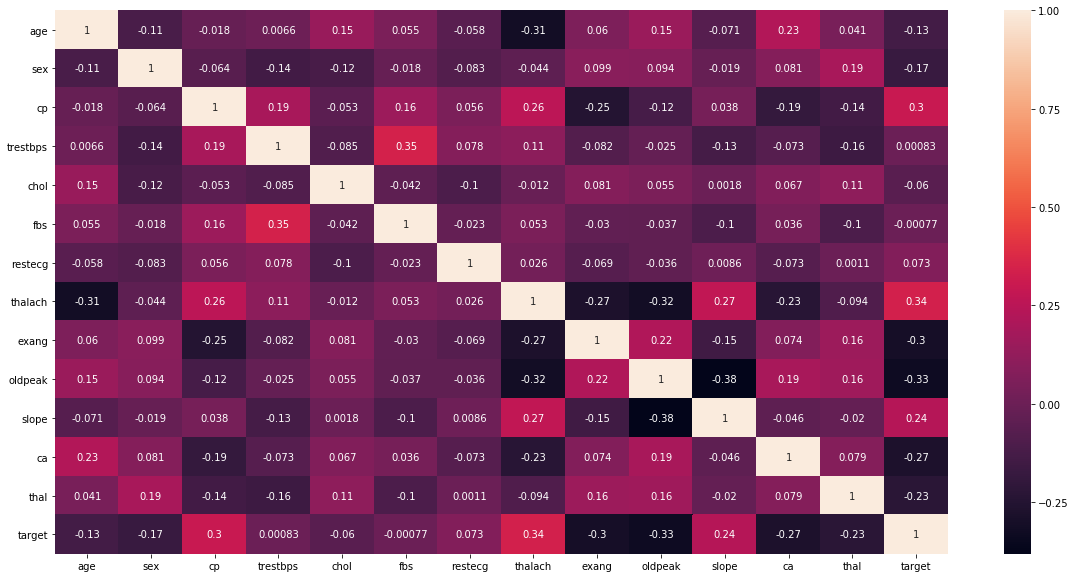

In [16]:
# plot correlation matrix
fig, ax=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B298B5C88>,
      dtype=object)

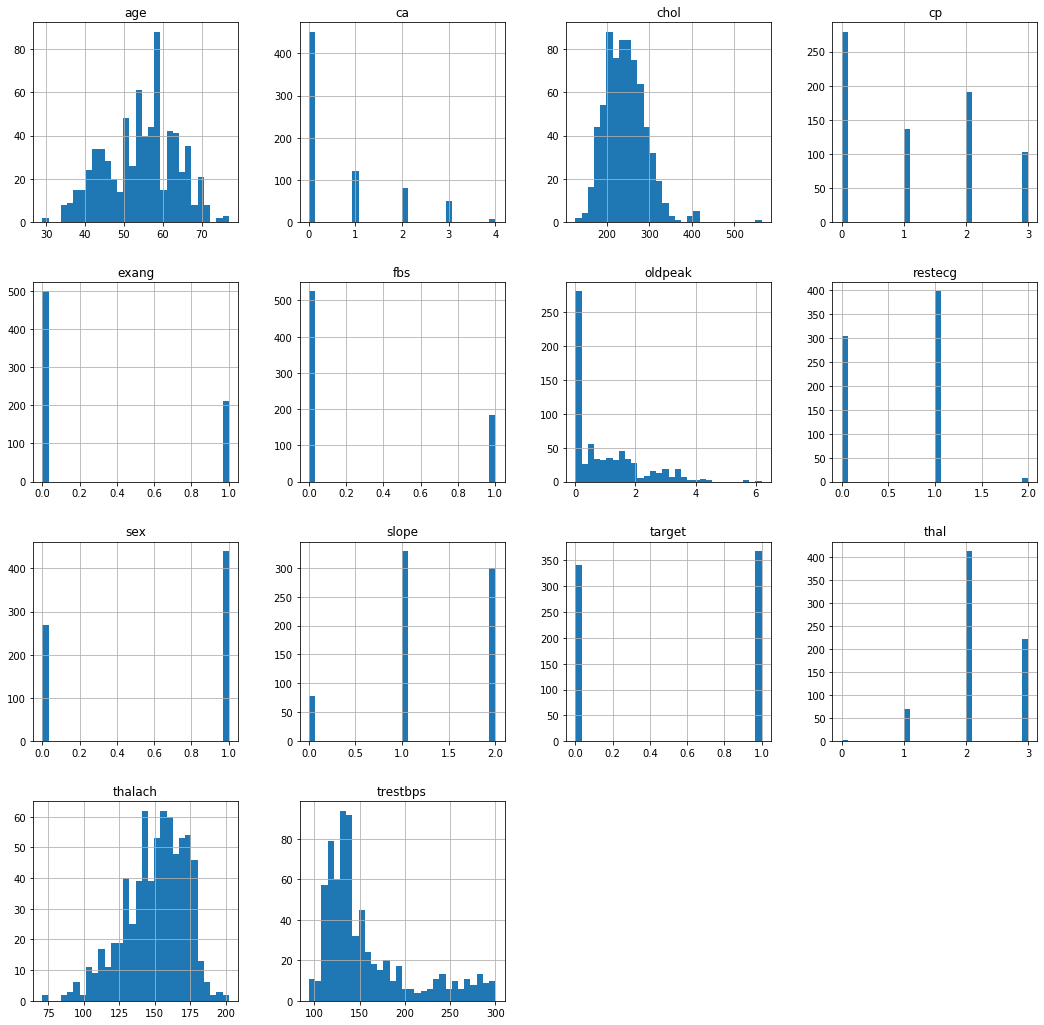

In [18]:
#Shows distribution of the data
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
data.hist(ax=ax,bins=30)


In [19]:
data['target'].value_counts() # to check whether target column is balanced or not

1    368
0    340
Name: target, dtype: int64

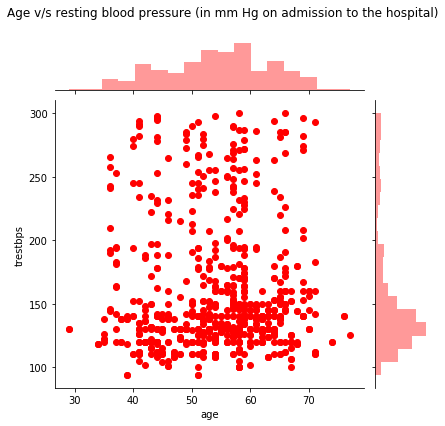

In [20]:
g=sns.jointplot(x="age", y="trestbps", data=data, color="r")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s resting blood pressure (in mm Hg on admission to the hospital)') 
plt.show()

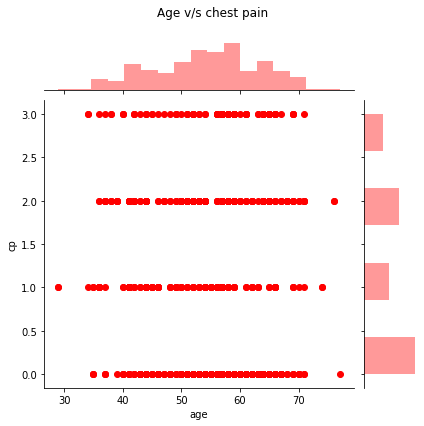

In [21]:
g=sns.jointplot(x="age", y="cp", data=data, color="r")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s chest pain') 
plt.show()

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2,1


In [23]:
X= data.iloc[:,0:13].values
y=data.iloc[:,13].values

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [25]:
# scaling features

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [58]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classfier=RandomForestClassifier(n_estimators=10)
classfier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred=classfier.predict(X_test)

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[54, 19],
       [17, 52]], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix

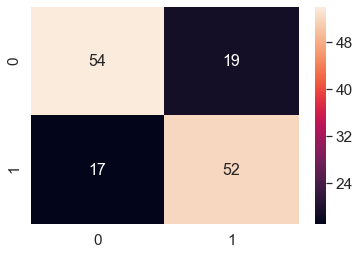

In [62]:
df_cm = pd.DataFrame(cm)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [32]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_test,y_pred)
ac1

0.823943661971831

In [63]:
# trying DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
y_pred1=classifier.predict(X_test)

In [65]:
cm1=confusion_matrix(y_test,y_pred1)
cm1


array([[54, 19],
       [16, 53]], dtype=int64)

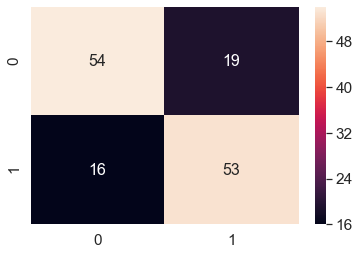

In [66]:
df_cm = pd.DataFrame(cm1)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [67]:
from sklearn.metrics import accuracy_score
ac2 = accuracy_score(y_test,y_pred)
ac2

0.7464788732394366

In [68]:
# importing ANN required things 
from keras.models import Sequential
from keras.layers import Dense

In [69]:
# initialize ANN
classifier=Sequential()

In [70]:
# Add input layer and 1st hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=13))

In [71]:
# add second hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

In [72]:
# Add output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [73]:
# compiling ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
# Fitting ANN
classifier.fit(X_train,y_train,batch_size=10,nb_epoch=100)

Epoch 1/100
566/566 [==============================] - 0s 823us/step - loss: 0.6930 - accuracy: 0.5300
Epoch 2/100
566/566 [==============================] - 0s 228us/step - loss: 0.6870 - accuracy: 0.7403
Epoch 3/100
566/566 [==============================] - 0s 212us/step - loss: 0.6565 - accuracy: 0.7403
Epoch 4/100
566/566 [==============================] - 0s 211us/step - loss: 0.6037 - accuracy: 0.7491
Epoch 5/100
566/566 [==============================] - 0s 220us/step - loss: 0.5620 - accuracy: 0.7473
Epoch 6/100
566/566 [==============================] - 0s 208us/step - loss: 0.5334 - accuracy: 0.7438
Epoch 7/100
566/566 [==============================] - 0s 210us/step - loss: 0.5144 - accuracy: 0.7385
Epoch 8/100
566/566 [==============================] - 0s 205us/step - loss: 0.5023 - accuracy: 0.7509
Epoch 9/100
566/566 [==============================] - 0s 223us/step - loss: 0.4951 - accuracy: 0.7580
Epoch 10/100
566/566 [==============================] - 0s 222us/step - l

566/566 [==============================] - 0s 119us/step - loss: 0.4235 - accuracy: 0.8074
Epoch 80/100
566/566 [==============================] - 0s 142us/step - loss: 0.4244 - accuracy: 0.8092
Epoch 81/100
566/566 [==============================] - 0s 167us/step - loss: 0.4222 - accuracy: 0.8233
Epoch 82/100
566/566 [==============================] - 0s 163us/step - loss: 0.4215 - accuracy: 0.8163
Epoch 83/100
566/566 [==============================] - 0s 167us/step - loss: 0.4221 - accuracy: 0.8110
Epoch 84/100
566/566 [==============================] - 0s 163us/step - loss: 0.4200 - accuracy: 0.8057
Epoch 85/100
566/566 [==============================] - 0s 163us/step - loss: 0.4192 - accuracy: 0.8110
Epoch 86/100
566/566 [==============================] - 0s 164us/step - loss: 0.4184 - accuracy: 0.8110
Epoch 87/100
566/566 [==============================] - 0s 189us/step - loss: 0.4177 - accuracy: 0.8074
Epoch 88/100
566/566 [==============================] - 0s 131us/step - loss:

In [75]:
# predicting for test data
y_pred=classifier.predict(X_test)

In [76]:
y_pred=(y_pred>0.5)

In [77]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred)

In [78]:
cm2

array([[48, 25],
       [ 9, 60]], dtype=int64)

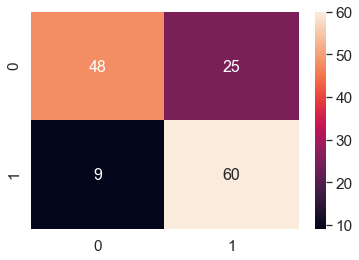

In [79]:
df_cm = pd.DataFrame(cm2)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [80]:
# getting accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)

In [81]:
ac

0.7605633802816901

In [82]:
#Comparing the results of the 3 models

{'RF': 0.823943661971831, 'ANN': 0.7605633802816901, 'DT': 0.7464788732394366}


([<matplotlib.axis.XTick at 0x18b36b4ce80>,
 <a list of 3 Text xticklabel objects>)

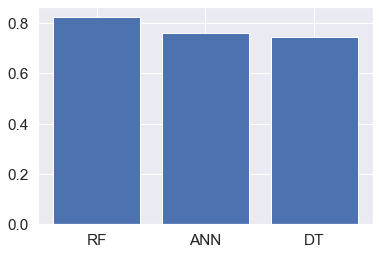

In [83]:
#Results = ('ac','ac1','ac2')
r= {}
r['RF']=ac1
r['ANN']=ac
r['DT']=ac2
print(r)
plt.bar(range(len(r)), list(r.values()), align='center')
plt.xticks(range(len(r)), list(r.keys()))
# sns.barplot(x='Results',y = 'target', hue='target')


# Conclusion

#On comparison we got to know that Random Forest can give us better prediction.
#We have analyzed several attributes and used those factors to predict from our model.